# Imports

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
# Paths for data.
Ravdess = "C:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/RAVDESS/audio_speech_actors_01-24/"
Crema = "C:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/CREMA/AudioWAV/"
Tess = "C:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "C:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/SAVEE/ALL/"


# Data Exploration

## Ravdess Dataframe

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:


Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
1  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
2  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
3  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
4     calm  C:/Users/gusta/Documents/Data Science Bootcamp...

## Crema Dataframe

In [7]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
1  disgust  C:/Users/gusta/Documents/Data Science Bootcamp...
2     fear  C:/Users/gusta/Documents/Data Science Bootcamp...
3    happy  C:/Users/gusta/Documents/Data Science Bootcamp...
4  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...

## TESS Dataset

In [36]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
1    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
2    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
3    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
4    angry  C:/Users/gusta/Documents/Data Science Bootcamp...

In [40]:
Tess_df.tail()

Emotions                                               Path
2795      sad  C:/Users/gusta/Documents/Data Science Bootcamp...
2796      sad  C:/Users/gusta/Documents/Data Science Bootcamp...
2797      sad  C:/Users/gusta/Documents/Data Science Bootcamp...
2798      sad  C:/Users/gusta/Documents/Data Science Bootcamp...
2799      sad  C:/Users/gusta/Documents/Data Science Bootcamp...

In [41]:
Tess_df.Emotions.unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

## SAVEE Dataset

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

'a' = 'anger'

'd' = 'disgust'

'f' = 'fear'

'h' = 'happiness'

'n' = 'neutral'

'sa' = 'sadness'

'su' = 'surprise'

In [11]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
1    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
2    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
3    angry  C:/Users/gusta/Documents/Data Science Bootcamp...
4    angry  C:/Users/gusta/Documents/Data Science Bootcamp...

## Complete Audio Dataset (All 4 Datasets together)

In [13]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
1  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
2  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
3  neutral  C:/Users/gusta/Documents/Data Science Bootcamp...
4     calm  C:/Users/gusta/Documents/Data Science Bootcamp...

# Data Exploration

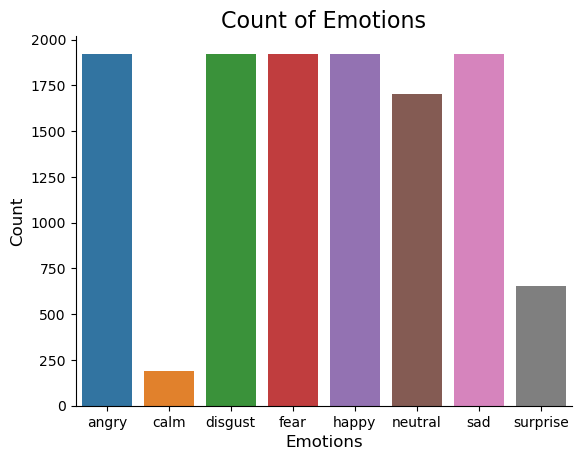

In [17]:
data_path['Emotions'] = data_path['Emotions'].astype('category')

# Create the countplot
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Waveplots and Spectrograms

In [50]:
def create_waveshow(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# def create_spectrogram(data, sr, e):
#     # stft function converts the data into short term fourier transform
#     X = librosa.stft(data)
#     Xmel = librosa.magphase(X)
#     Xdb = librosa.amplitude_to_db(Xmel, ref=np.min)
#     plt.figure(figsize=(12, 3))
#     plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
#     librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')   
#     plt.colorbar()

def create_spectrogram(data, sr, e):
    # Compute the spectrogram
    X = librosa.feature.melspectrogram(y=data, sr=sr)
    # Convert to decibels
    Xdb = librosa.power_to_db(X, ref=np.max)
    # Create the spectrogram plot
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    # Use librosa.display.specshow to display the spectrogram
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')



### Fear

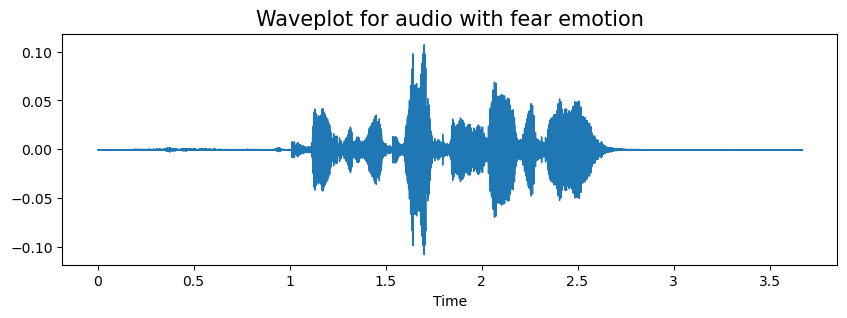

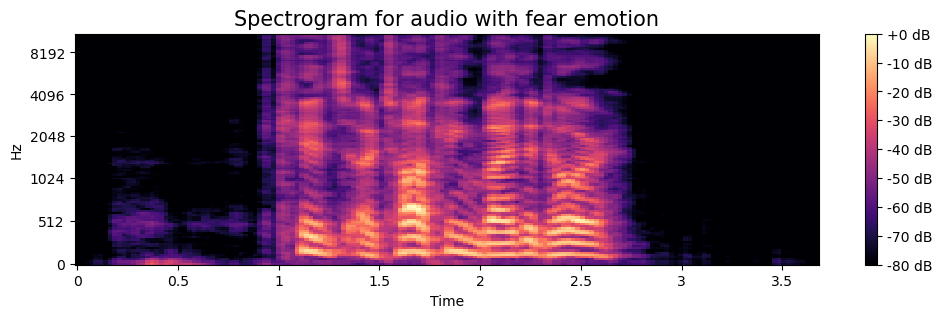

In [58]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Angry

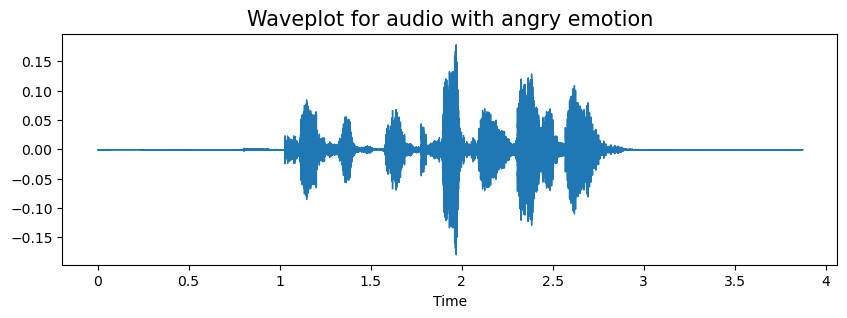

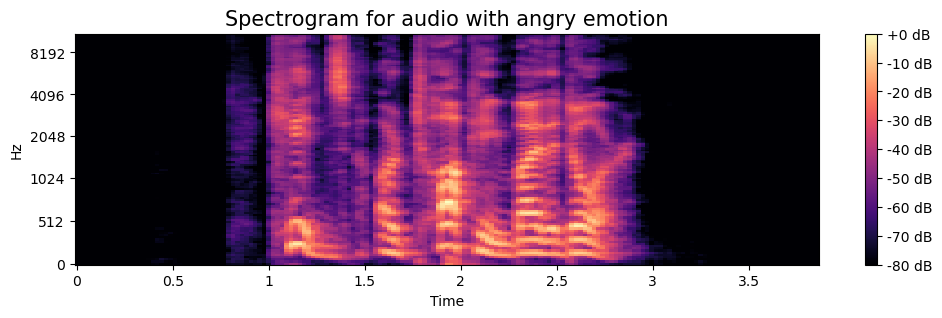

In [59]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Sad

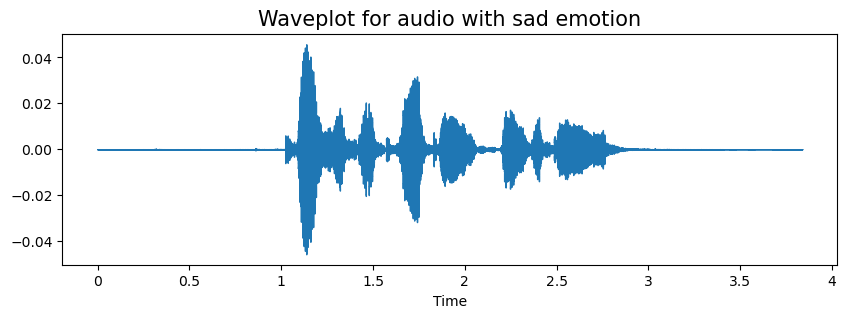

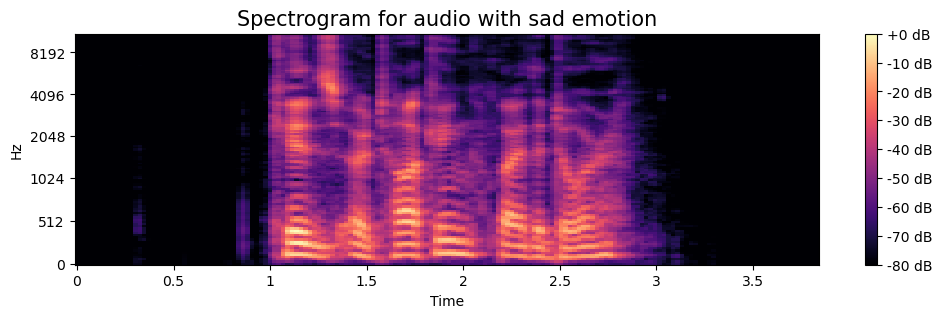

In [61]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Happy

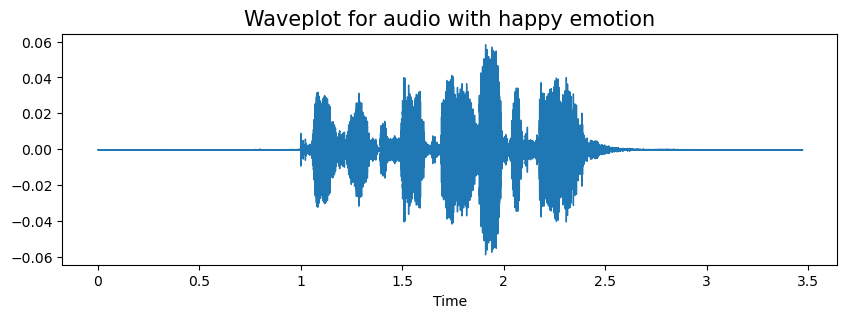

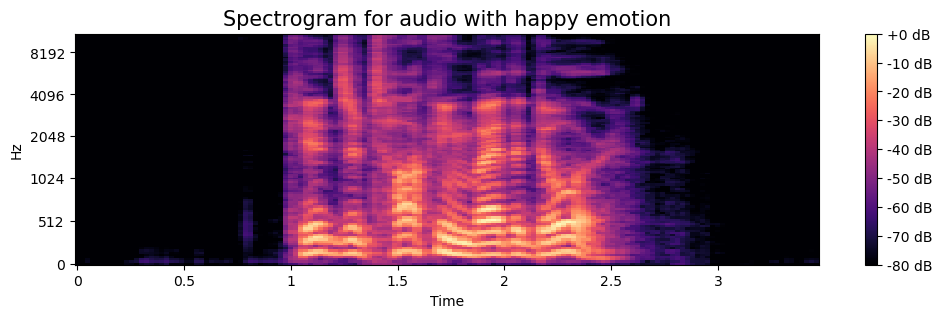

In [62]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Surprise

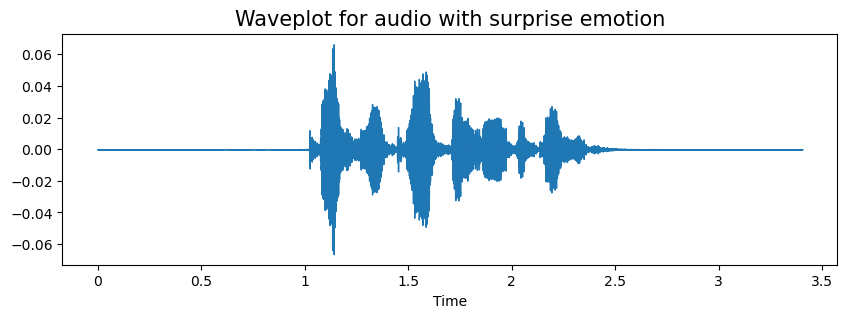

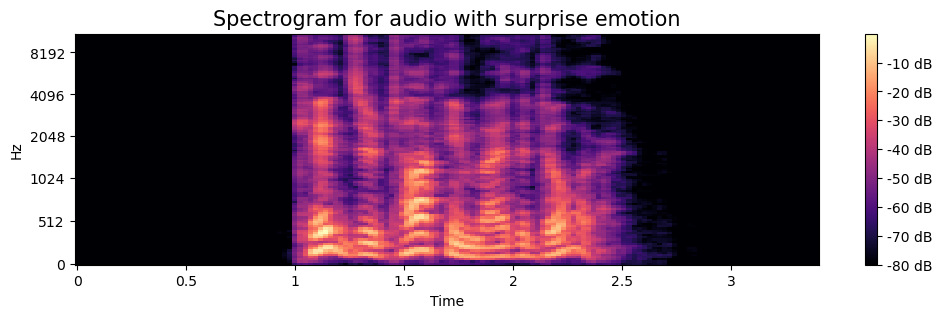

In [63]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Disgust

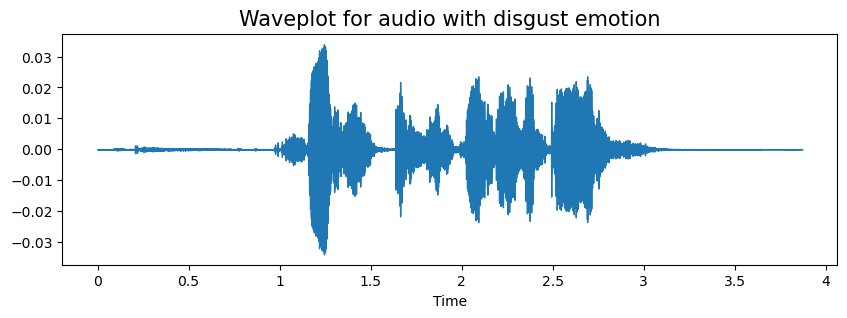

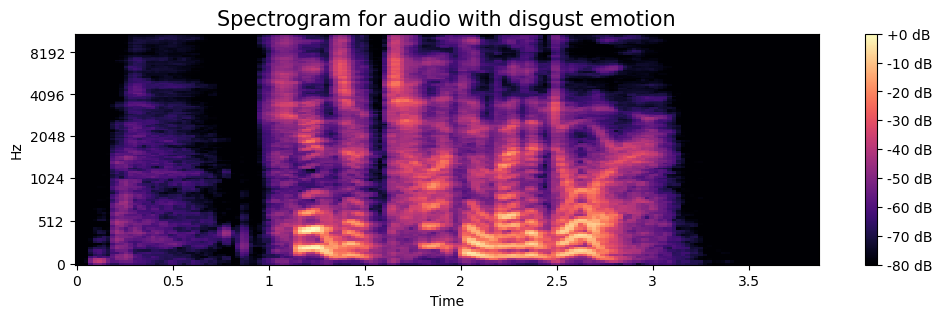

In [64]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Calm

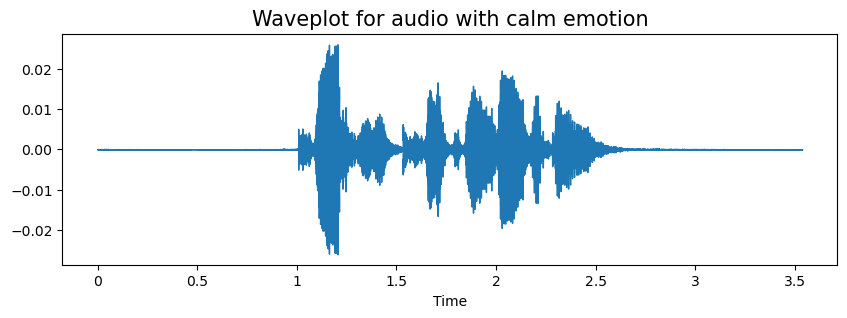

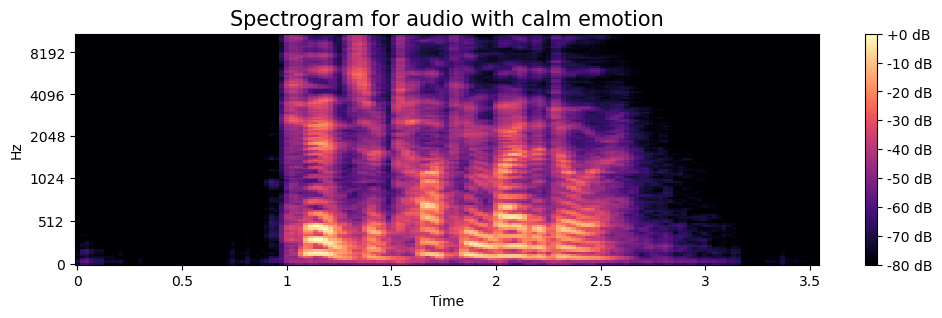

In [65]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Neutral

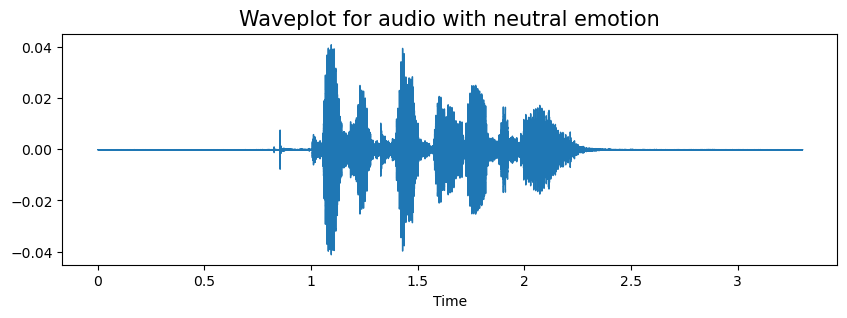

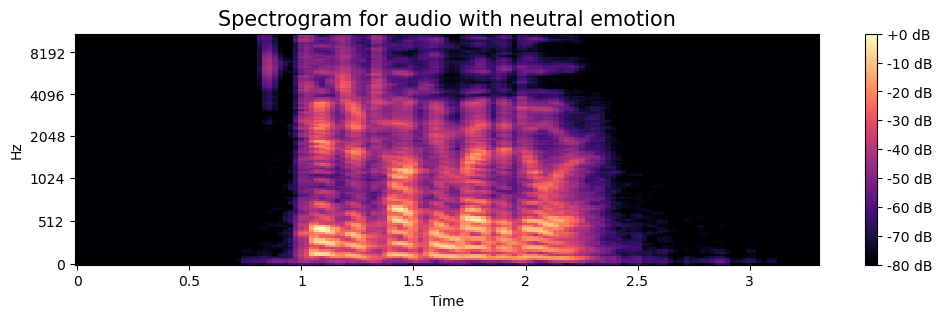

In [66]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)